In [28]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [29]:
data = pd.read_csv('E:\\iPython_Notebooks\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


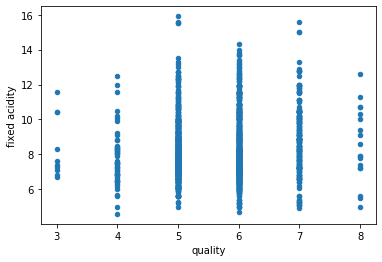

In [6]:
data.plot(kind='scatter',x='quality',y='fixed acidity')

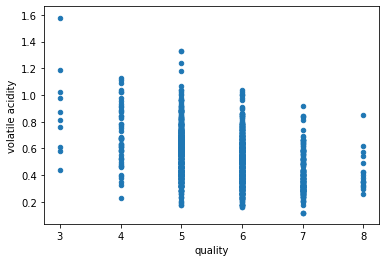

In [7]:
data.plot(kind='scatter',x='quality',y='volatile acidity')

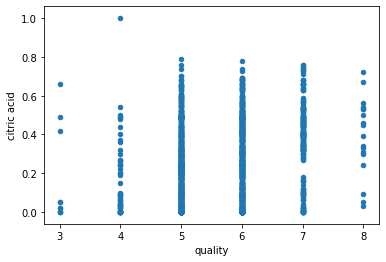

In [8]:
data.plot(kind='scatter',x='quality',y='citric acid')

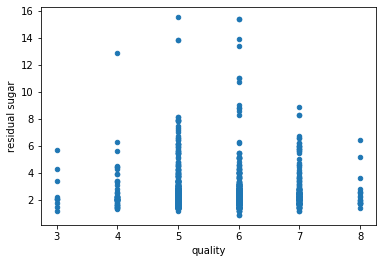

In [9]:
data.plot(kind='scatter',x='quality',y='residual sugar')

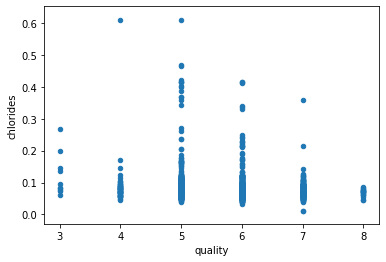

In [10]:
data.plot(kind='scatter',x='quality',y='chlorides')

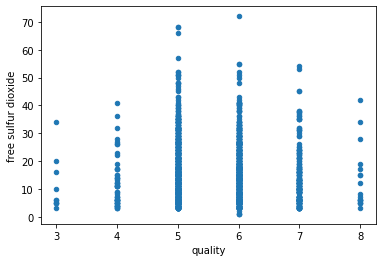

In [11]:
data.plot(kind='scatter',x='quality',y='free sulfur dioxide')

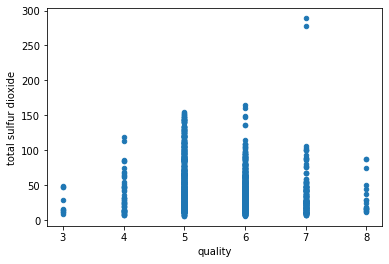

In [12]:
data.plot(kind='scatter',x='quality',y='total sulfur dioxide')

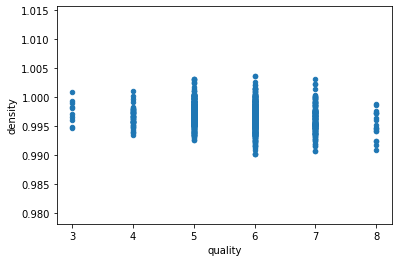

In [13]:
data.plot(kind='scatter',x='quality',y='density')

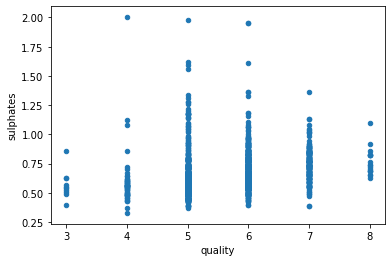

In [14]:
data.plot(kind='scatter',x='quality',y='sulphates')

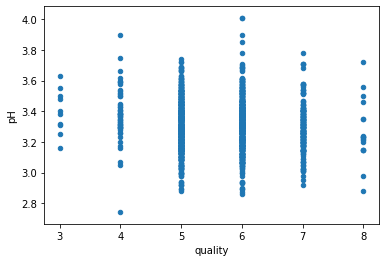

In [15]:
data.plot(kind='scatter',x='quality',y='pH')

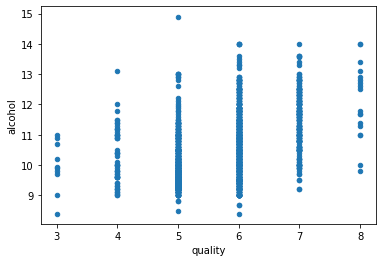

In [16]:
data.plot(kind='scatter',x='quality',y='alcohol')

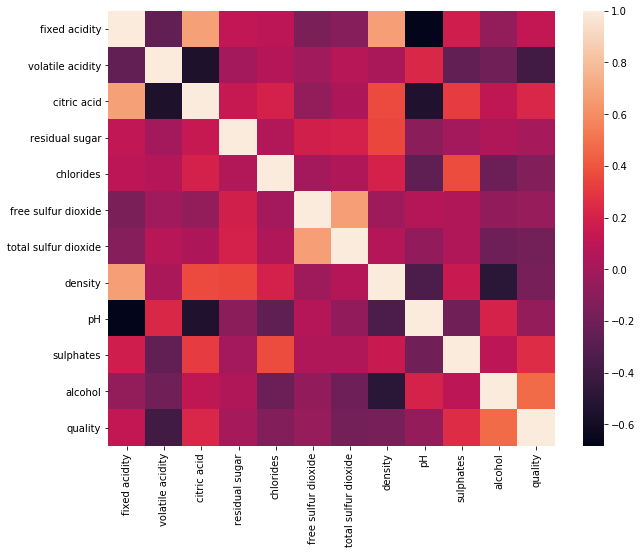

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr()) #Correlation between columns

In [33]:
x=data.drop(['quality'],axis=1)
y=data['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
305,10.3,0.53,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3
984,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
47,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5
812,10.8,0.45,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,10.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1393,8.0,0.52,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2
1344,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0
527,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4
1149,10.0,0.35,0.47,2.0,0.061,6.0,11.0,0.99585,3.23,0.52,12.0


In [34]:
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)
print(lr.intercept_)
print(lr.coef_)

9.096028695574242
[ 1.95745457e-02 -1.27514299e+00 -2.32964035e-01  8.61600558e-04
 -1.84812946e+00  3.04276819e-03 -3.31540195e-03 -4.90995213e+00
 -3.04488711e-01  8.21320147e-01  2.62886677e-01]


In [35]:
from sklearn.metrics import mean_squared_error
import math
train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)
print("RMSE Train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test:",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train: 0.6412213289287892
RMSE Test: 0.6609647347330045


In [36]:
lr.score(x_train, y_train)

0.3490758916453378

In [37]:
lr.score(x_test, y_test)

0.37440422831407505

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [39]:
#print confusion matrix and accuracy score
import sklearn.metrics
#dt_confusion_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)
#print(dt_confusion_matrix)
print(dt_accuracy_score*100)

NameError: name 'accuracy_score' is not defined